_Alonso Ogueda_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd
from scipy.io import loadmat
from PIL import Image, ImageSequence

np.random.seed(42)

## Excercise 1

In [2]:
t = np.arange(0,500 + 0.1, 0.1)
Xtrue = np.sin(t)
Xnoisy = Xtrue + np.random.normal(loc=0.0, scale=1.0, size=len(Xtrue)) / 10
RMSE = np.sqrt(np.mean((Xnoisy - Xtrue) ** 2))
print(RMSE)

0.09963143191116908


## Exercise 2

In [3]:
t = np.arange(0,500 + 0.1, 0.1)
Xtrue = np.sin(t) + np.sin( t * np.sqrt(2) / 2)
Xnoisy = Xtrue + np.random.normal(loc=0.0, scale=1.0, size=len(Xtrue)) / 10
RMSE = np.sqrt(np.mean((Xnoisy - Xtrue) ** 2))
print(RMSE)

0.10103202820638055


In [4]:
chaotic_data = loadmat("ChaoticData.mat")
Xtrue = chaotic_data["Xtrue"].squeeze()
Xnoisy = chaotic_data["Xnoisy"].squeeze()
RMSE = np.sqrt(np.mean((Xnoisy - Xtrue) ** 2))
print(RMSE)

1.5054706227031776


## Exercise 3

In [5]:
def TimeDelayEmbedding(timeSeries, delays):
    delaySeries = []
    N = len(timeSeries)
    for i in range(delays):
        delaySeries.append(
            timeSeries[delays - i - 1: N - i]
        )
    return np.array(delaySeries).T
   

In [6]:
def plot_pca(X, title=None):
    Y = TimeDelayEmbedding(X, 25)
    X_pca = PCA(n_components=3).fit_transform(Y)
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        X_pca[:, 2],
        alpha=0.25
    )
    if title is None:
        title = "First three PCA directions"
    ax.set_title(title)
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])
    plt.show()

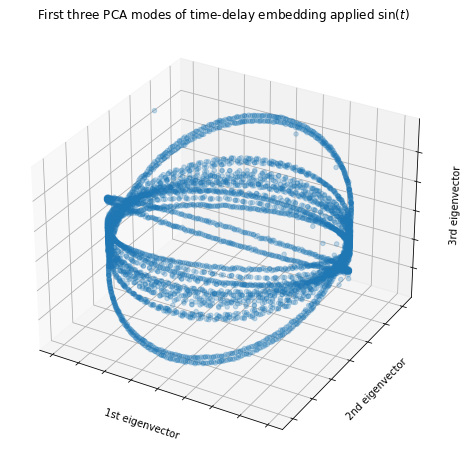

In [7]:
plot_pca(np.sin(t), title=r"First three PCA modes of time-delay embedding applied $\sin(t)$")

This looks like multiple circles of same radius intersecting at two points.

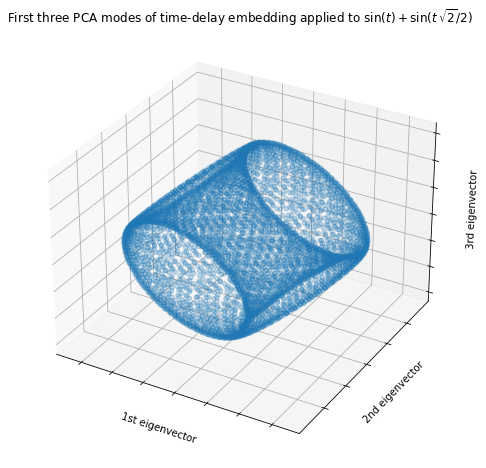

In [8]:
plot_pca(
    np.sin(t) + np.sin( t * np.sqrt(2) / 2),
    title=r"First three PCA modes of time-delay embedding applied to $\sin(t) + \sin ( t \, \sqrt{2} / 2)$"    
)

This looks like a torus.

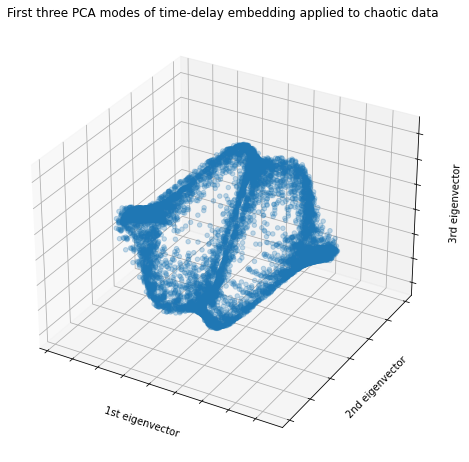

In [9]:
plot_pca(
    chaotic_data["Xtrue"].squeeze(),
    title="First three PCA modes of time-delay embedding applied to chaotic data"
)

There is some symmetry on this figure but it is hard to figure out what is the real topology/geometry from these points.

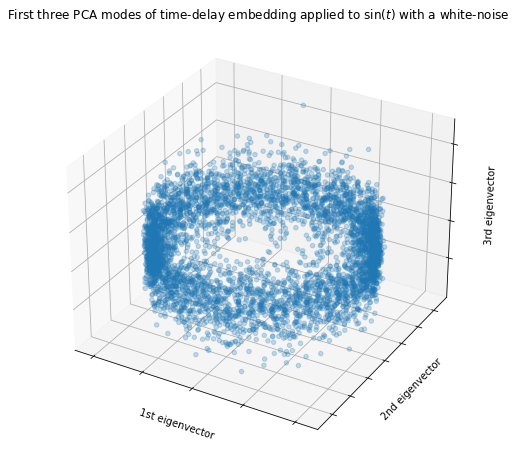

In [10]:
Xtrue = np.sin(t)
Xnoisy = Xtrue + np.random.normal(loc=0.0, scale=1.0, size=len(Xtrue)) / 10
plot_pca(Xnoisy, title=r"First three PCA modes of time-delay embedding applied to $\sin(t)$ with a white-noise")

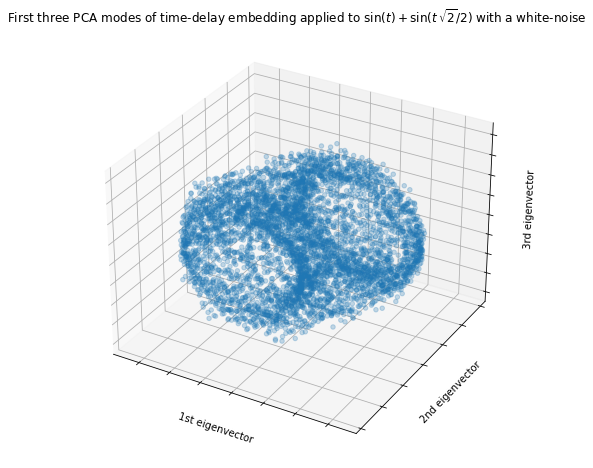

In [11]:
Xtrue = np.sin(t) + np.sin( t * np.sqrt(2) / 2)
Xnoisy = Xtrue + np.random.normal(loc=0.0, scale=1.0, size=len(Xtrue)) / 10
plot_pca(
    Xnoisy,
    title=r"First three PCA modes of time-delay embedding applied to $\sin(t) + \sin ( t \, \sqrt{2} / 2)$ with a white-noise"    
)

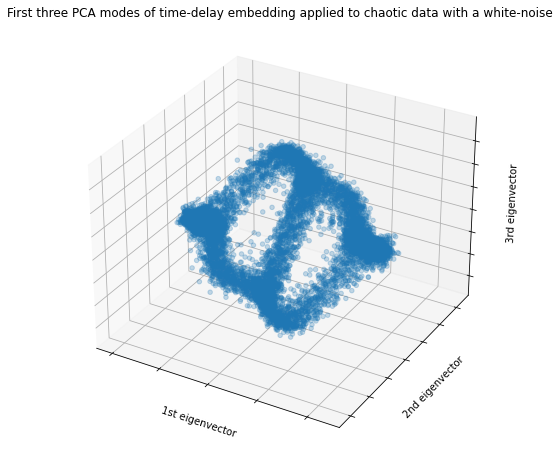

In [12]:
plot_pca(
    chaotic_data["Xnoisy"].squeeze(),
    title="First three PCA modes of time-delay embedding applied to chaotic data with a white-noise"
)

Even with noisy data it is possible to determine the same geometries than the real data.

## Exercise 4

In [13]:
def reconstruct_series(Xtrue, Xnoisy, d, pca_modes):
    Y = TimeDelayEmbedding(Xnoisy, d)
    Yr = PCA(n_components=pca_modes).fit_transform(Y)
    Xrecon = Yr[:, -1]
    rmse = np.sqrt(np.mean((Xtrue[: 1 - d] - Xrecon) ** 2))
    return rmse

In [14]:
d = 100
Xtrue = np.sin(t)
Xnoisy = Xtrue + np.random.normal(loc=0.0, scale=1.0, size=len(Xtrue)) / 10
for k in [3, 5, 10, 25]:
    rmse = reconstruct_series(Xtrue, Xnoisy, d, k)
    print(f"RMSE using the first {k} PCA modes: {rmse}")

RMSE using the first 3 PCA modes: 0.7170893068002395
RMSE using the first 5 PCA modes: 0.7159524314098631
RMSE using the first 10 PCA modes: 0.7147854136612083
RMSE using the first 25 PCA modes: 0.7140311161636366


In [15]:
d = 100
Xtrue = np.sin(t) + np.sin( t * np.sqrt(2) / 2)
Xnoisy = Xtrue + np.random.normal(loc=0.0, scale=1.0, size=len(Xtrue)) / 10
for k in [3, 5, 10, 25]:
    rmse = reconstruct_series(Xtrue, Xnoisy, d, k)
    print(f"RMSE using the first {k} PCA modes: {rmse}")

RMSE using the first 3 PCA modes: 2.9913040619853875
RMSE using the first 5 PCA modes: 1.0032649729198644
RMSE using the first 10 PCA modes: 1.0026397568287018
RMSE using the first 25 PCA modes: 1.0013511998928946


In [16]:
d = 100
Xtrue = chaotic_data["Xtrue"].squeeze()
Xnoisy = chaotic_data["Xnoisy"].squeeze()
for k in [3, 5, 10, 25]:
    rmse = reconstruct_series(Xtrue, Xnoisy, d, k)
    print(f"RMSE using the first {k} PCA modes: {rmse}")

RMSE using the first 3 PCA modes: 21.523895387644906
RMSE using the first 5 PCA modes: 16.599777582020206
RMSE using the first 10 PCA modes: 15.771818482289676
RMSE using the first 25 PCA modes: 12.874503509199911


In [17]:
np.mean(Xtrue - Xnoisy)

0.005328787334835473

In [18]:
np.std(Xtrue - Xnoisy)

1.5054611917441887

Based on RMSE we could suggest than a greater amount of PCA modes should give us a better reconstruction. However, the complexity of the data is also important, the first data has a low error independent of the number of modes, but the second data had a considerable better performance increasing from 3 to 5 modes. Finally, we could conclude that chaotic data represents a very complex model (since it seems the noisy version was contamined also with a standar gaussian distribution).

## Exercise 5

In [19]:
im = Image.open('9RDU.gif', )
A = np.array(list(np.asarray(frame).reshape(-1).astype(float) for frame in ImageSequence.Iterator(im)), float).T
# A = loadmat("9RDU.mat")["A"].reshape(270, 480, 226)
A.shape

(129600, 226)

In [20]:
svd_components = 5
u, s, vh = randomized_svd(A, n_components=svd_components)

Note: My laptop ran out of RAM so I decided to use a randomized implementation for the first five components. I have used it before with some good results since the number of componentes we are looking is so much less than the number of columns of the data. Source: [Finding structure with randomness: Stochastic algorithms for constructing approximate matrix decompositions (Algorithm 4.3) Halko, et al., 2009](https://arxiv.org/abs/0909.4061).

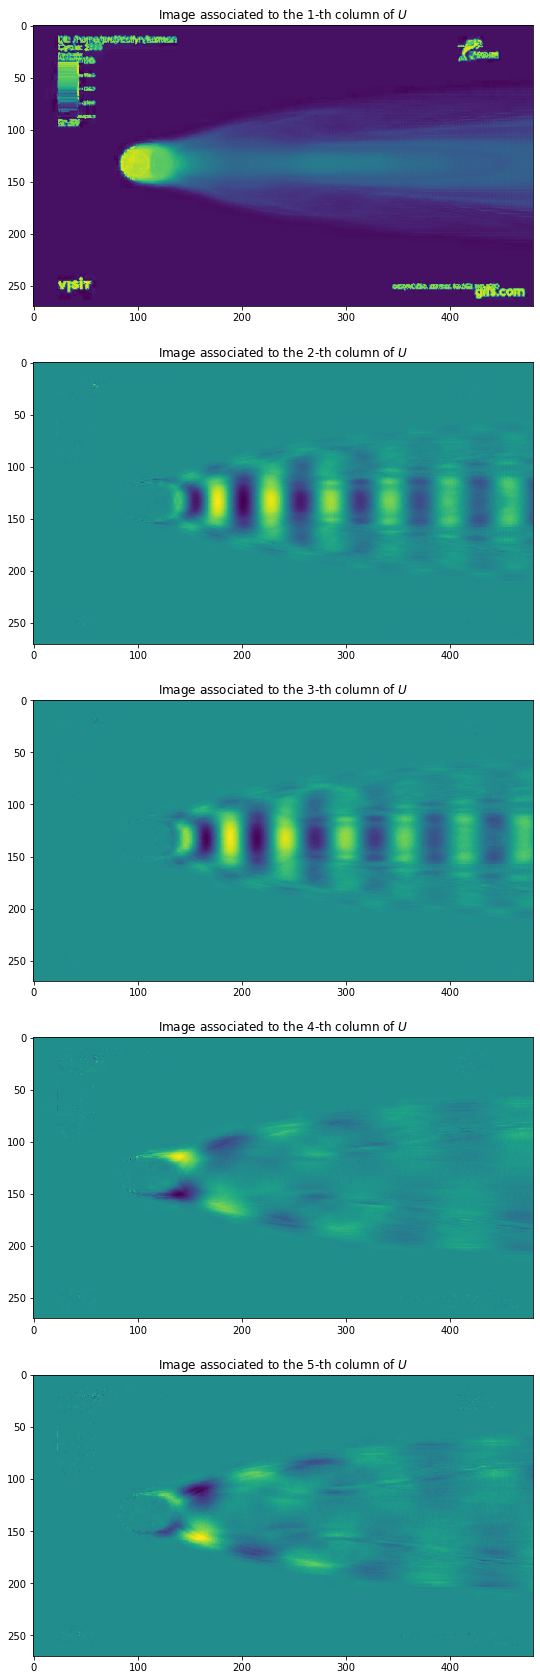

In [21]:
fig, axes = plt.subplots(nrows=svd_components, figsize=(10, 30))
for i, ax in enumerate(axes):
    u_img = u[:, i].reshape(270, 480)
    ax.imshow(u_img)
    ax.set_title(rf"Image associated to the {i + 1}-th column of $U$")
fig.show()

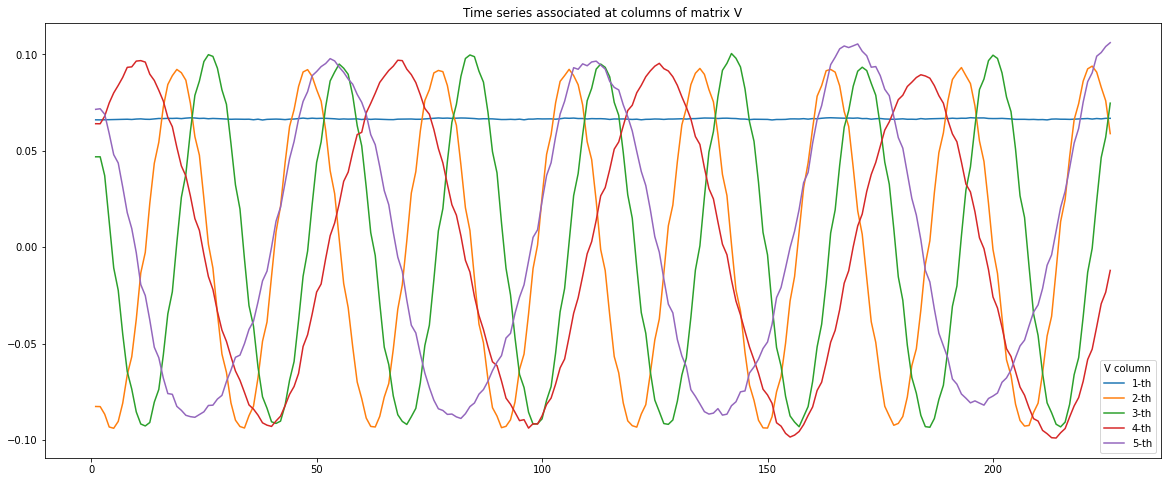

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
x = range(1, vh.shape[1] + 1)
for i in range(svd_components):
    vh_serie = vh[i, :]
    ax.plot(x, vh_serie, label=f"{i+1}-th")
    ax.legend(title="V column")
ax.set_title(f"Time series associated at columns of matrix V")
fig.show()

Since eigenvalues are ordered according its _importance_ (module) it seems that our SVD decomposition is capturing shapes/edges/geometries/values which are more common in every moment. We can see in the image related to the first component the words and colorbar that are always in the same place (and probably that is why the time series associated to $V$ is constant). The second and third picture are related to waves of the system. Last ones are more diffused and probably are not getting us so much information related to the system, we can see that their related time series have a larger period.